In [2]:
#import required packages
import os
import pandas as pd
from pathlib import Path
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
#import 16S relative abundance results and combine into one dataframe

data_frames = []
#Determine the path that will lead to your mobsuite results files for all HLF genomes
for file_name in ['HC06.csv', 'HC08.csv', 'HC09.csv', 'HC10.csv', 'HC11.csv', 'HC14.csv', 'HC15.csv', 'HC16.csv', 'HC17.csv', 'HC18.csv', 'HC20.csv', 'HC21.csv', 'HC22.csv', 'HC23.csv', 'HC24.csv', 'HC25.csv', 'HC26.csv', 'HC27.csv', 'HC28.csv', 'HC29.csv', 'HC30.csv', 'HC31.csv', 'HC32.csv', 'HC33.csv', 'HC34.csv', 'HC35.csv', 'HC36.csv', 'HC40.csv', 'HC41.csv', 'HC42.csv', 'HC43.csv', 'HC44.csv', 'HC45.csv', 'HC46.csv', 'HC47.csv', 'HC48.csv', 'HC50.csv', 'HC52.csv', 'HC53.csv', 'HC54.csv', 'HC55.csv', 'HC56.csv', 'HC58.csv', 'HC59.csv', 'HC61.csv', 'HC63.csv']:
    df = pd.read_csv(file_name, usecols=['abundance', 'species'])
    df['filename'] = os.path.basename(file_name)
    data_frames.append(df)
    
combined_df = pd.concat(data_frames)
#combined_df = combined_df.set_index('species')
#combined_df = combined_df.unstack()
#combined_df = combined_df.rename(columns=lambda x: x[1])
#combined_df = combined_df.reset_index()

In [3]:
#generate pivot table from all the abundance results
df_pivot = combined_df.pivot(index='species', columns='filename', values='abundance')

In [4]:
df_pivot.columns = [f'abundance_{col}' for col in df_pivot.columns]

In [5]:
# fill all the na in the pivot table
cath = df_pivot.fillna(0)

In [6]:
#clean up column names
cath.columns = cath.columns.str.replace('abundance_', '').str.replace('.csv', '')

In [7]:
#take a look at the pivot table
cath

,HC06,HC08,HC09,HC10,HC11,HC14,HC15,HC16,HC17,HC18,...,HC50,HC52,HC53,HC54,HC55,HC56,HC58,HC59,HC61,HC63
species,,,,,,,,,,,,,,,,,,,,,
Achromobacter animicus,0.0,0.0,0.0,0.0,0.0,0.000006,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Achromobacter denitrificans,0.0,0.0,0.0,0.0,0.0,0.000089,0.0,0.0,0.000030,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Achromobacter insolitus,0.0,0.0,0.0,0.0,0.0,0.000005,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Achromobacter mucicolens,0.0,0.0,0.0,0.0,0.0,0.000005,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Achromobacter sp. AONIH1,0.0,0.0,0.0,0.0,0.0,0.000005,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Zymomonas mobilis,0.0,0.0,0.0,0.0,0.0,0.000007,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
[Polyangium] brachysporum,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000046,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
[Pseudomonas] hibiscicola,0.0,0.0,0.0,0.0,0.0,0.000007,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [8]:
#cath_filtered = cath.mask(cath < 0.001).dropna()

In [9]:
# Remove abundances lower than 0.01
cath_filtered = cath.where(cath > 0.01, other=float('0'))

In [10]:
#get rid of rows that have a sum of zero
cath_filtered = cath_filtered.loc[cath_filtered.sum(axis=1) != 0]

In [11]:
#take a look at the filtered table
cath_filtered

,HC06,HC08,HC09,HC10,HC11,HC14,HC15,HC16,HC17,HC18,...,HC50,HC52,HC53,HC54,HC55,HC56,HC58,HC59,HC61,HC63
species,,,,,,,,,,,,,,,,,,,,,
Achromobacter spanius,0.000000,0.000000,0.000000,0.000000,0.000000,0.025966,0.025761,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
Achromobacter xylosoxidans,0.000000,0.000000,0.000000,0.000000,0.000000,0.067431,0.067171,0.000000,0.029067,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
Acinetobacter johnsonii,0.011632,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
Aeromonas salmonicida,0.000000,0.000000,0.000000,0.000000,0.000000,0.027987,0.025159,0.000000,0.013999,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
Anaerococcus hydrogenalis,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.015094,0.000000,0.0
Comamonas testosteroni,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.010345,0.000000,0.000000,0.000000,0.000000,0.0
Delftia acidovorans,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.027428,0.000000,0.028942,0.023259,0.019013,0.000000,0.045550,0.025250,0.018687,0.0
Delftia sp. Cs1-4,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.061552,0.000000,0.106823,0.119624,0.122366,0.000000,0.041155,0.076637,0.021964,0.0
Enterobacter asburiae,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.070358,0.230769,0.146687,0.165929,0.163861,0.000000,0.080845,0.110468,0.119322,0.0


In [12]:
#transpose the table
cath_filtered_T = cath_filtered.T


In [13]:
#remove rows based on contamination
rows_to_remove = ['HC20', 'HC21', 'HC30', "HC31", 'HC34', 'HC35', 'HC40', 'HC42', 'HC43', 'HC44', 'HC46']
cath_filtered_T = cath_filtered_T.drop(index=rows_to_remove)

In [14]:
#save transposed table
cath_filtered_T. to_csv("05192023_Catheter_data_for_R.csv")

In [15]:
#save the none transposed table
cath_filtered = cath_filtered_T.T

In [16]:
#save the non-transposed table
cath_filtered.to_csv("05192023_catheter_data_for_lefse.csv")

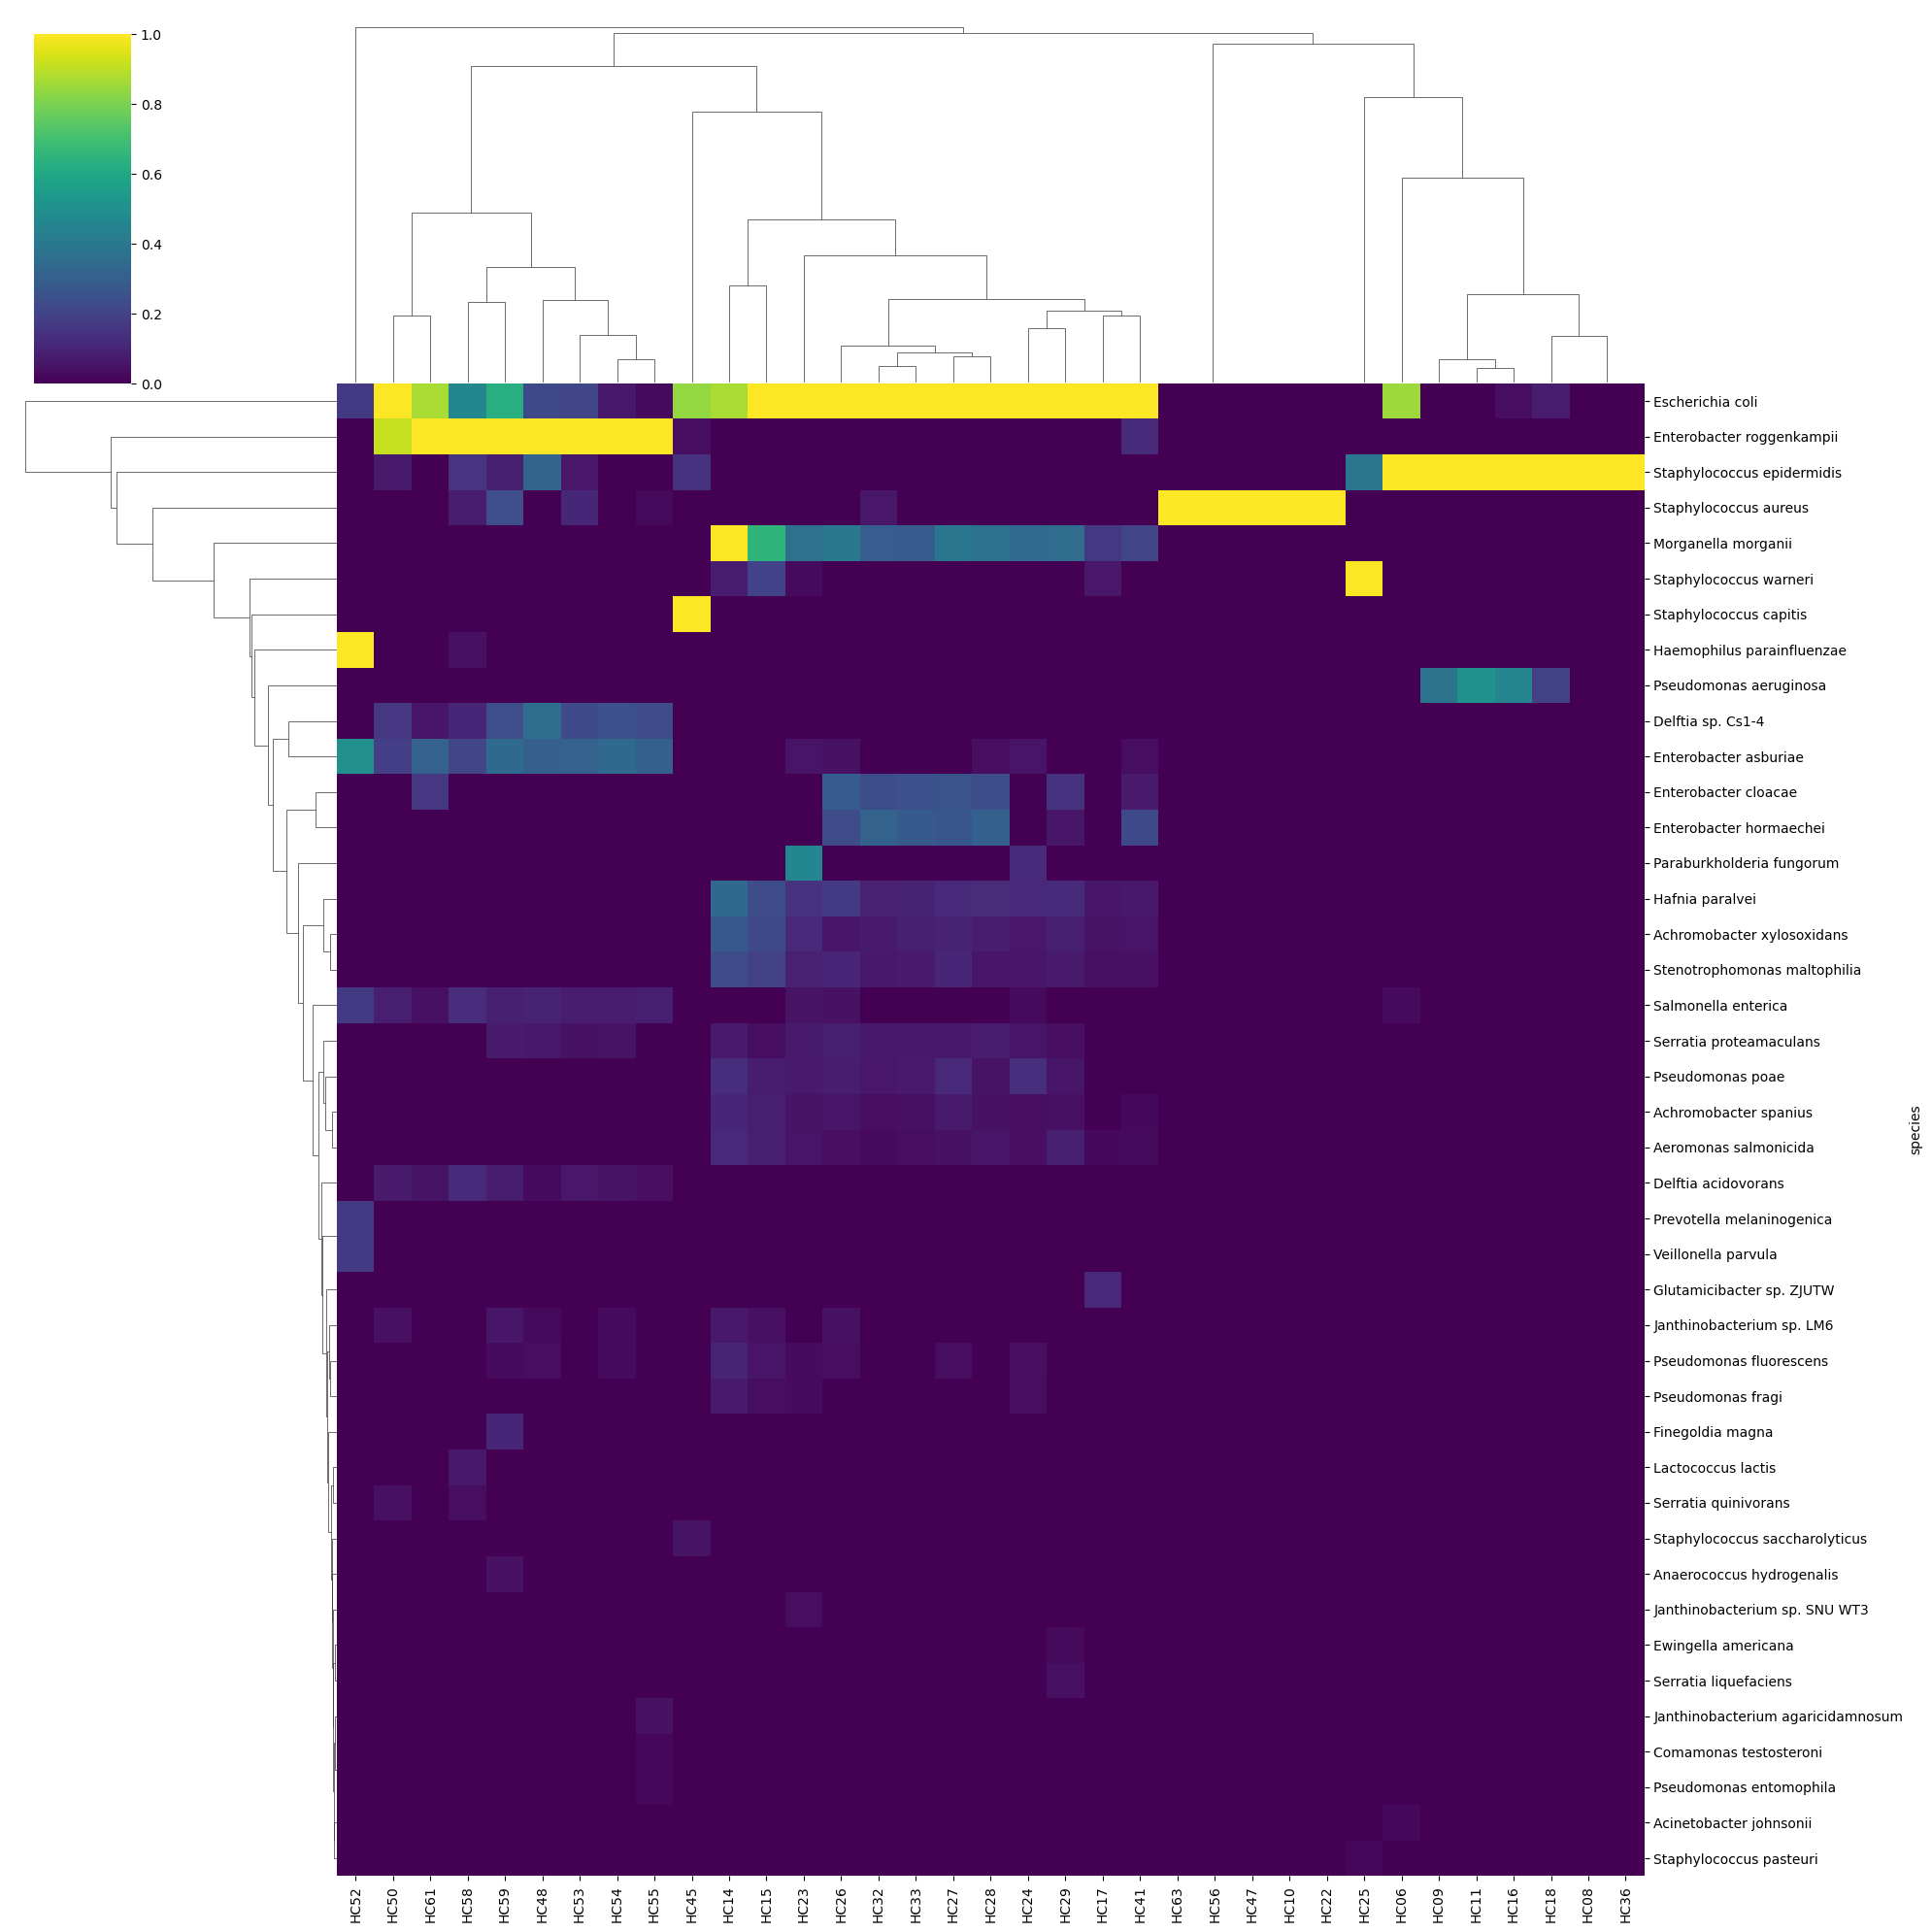

In [17]:
#generate a clustermap with the relative abundance of the species using the non-transposed table and save it
clustermap = sns.clustermap(cath_filtered, cmap='viridis', metric='euclidean', standard_scale=1, figsize=(20, 20))

clustermap.savefig('05192023_catheter_clustermap.png', dpi=300, bbox_inches='tight')

In [18]:
#get all of the speices names
cath_filtered.axes[0].tolist()

['Achromobacter spanius',
 'Achromobacter xylosoxidans',
 'Acinetobacter johnsonii',
 'Aeromonas salmonicida',
 'Anaerococcus hydrogenalis',
 'Comamonas testosteroni',
 'Delftia acidovorans',
 'Delftia sp. Cs1-4',
 'Enterobacter asburiae',
 'Enterobacter cloacae',
 'Enterobacter hormaechei',
 'Enterobacter roggenkampii',
 'Escherichia coli',
 'Ewingella americana',
 'Finegoldia magna',
 'Glutamicibacter sp. ZJUTW',
 'Haemophilus parainfluenzae',
 'Hafnia paralvei',
 'Janthinobacterium agaricidamnosum',
 'Janthinobacterium sp. LM6',
 'Janthinobacterium sp. SNU WT3',
 'Lactococcus lactis',
 'Morganella morganii',
 'Paraburkholderia fungorum',
 'Prevotella melaninogenica',
 'Pseudomonas aeruginosa',
 'Pseudomonas entomophila',
 'Pseudomonas fluorescens',
 'Pseudomonas fragi',
 'Pseudomonas poae',
 'Salmonella enterica',
 'Serratia liquefaciens',
 'Serratia proteamaculans',
 'Serratia quinivorans',
 'Staphylococcus aureus',
 'Staphylococcus capitis',
 'Staphylococcus epidermidis',
 'Staphy

In [19]:
#make a colour map with all the species
cmap = {'Achromobacter spanius':'#ffff00',
 'Achromobacter xylosoxidans':'#fff0f5',
 'Acinetobacter johnsonii':'#ffe4b5',
 'Aeromonas salmonicida':'#ffdab9',
 'Anaerococcus hydrogenalis':'#ffd700',
 'Comamonas testosteroni':'#ffc0cb',
 'Delftia acidovorans':'#ff6347',
 'Delftia sp. Cs1-4':'#ff00ff',
 'Enterobacter asburiae':'#fafad2',
 'Enterobacter cloacae':'#f5fffa',
 'Enterobacter hormaechei':'#f0f8ff',
 'Enterobacter roggenkampii':'#ee82ee',
 'Escherichia coli':'#6b8ba4',
 'Ewingella americana':'#dda0dd',
 'Finegoldia magna':'#d2691e',
 'Glutamicibacter sp. ZJUTW':'#b0e0e6',
 'Haemophilus parainfluenzae':'#afeeee',
 'Hafnia paralvei':'#adff2f',
 'Janthinobacterium agaricidamnosum':'#9932cc',
 'Janthinobacterium sp. LM6':'#98fb98',
 'Janthinobacterium sp. SNU WT3':'#9370db',
 'Lactococcus lactis':'#8fbc8f',
 'Morganella morganii':'#8a2be2',
 'Paraburkholderia fungorum':'#808080',
 'Prevotella melaninogenica':'#800080',
 'Pseudomonas aeruginosa':'#7fffd4',
 'Pseudomonas entomophila':'#556b2f',
 'Pseudomonas fluorescens':'#32cd32',
 'Pseudomonas fragi':'#00ffff',
 'Pseudomonas poae':'#00ff7f',
 'Salmonella enterica':'#8b008b',
 'Serratia liquefaciens':'#00ff00',
 'Serratia proteamaculans':'#008b8b',
 'Serratia quinivorans':'#008080',
 'Staphylococcus aureus':'#ffa500',
 'Staphylococcus capitis':'#8b0000',
 'Staphylococcus epidermidis':'#cd5c5c',
 'Staphylococcus pasteuri':'#008000',
 'Staphylococcus saccharolyticus':'#ff69b4',
 'Staphylococcus warneri':'#0000ff',
 'Stenotrophomonas maltophilia':'#000080',
 'Veillonella parvula':'#ffebcd'}

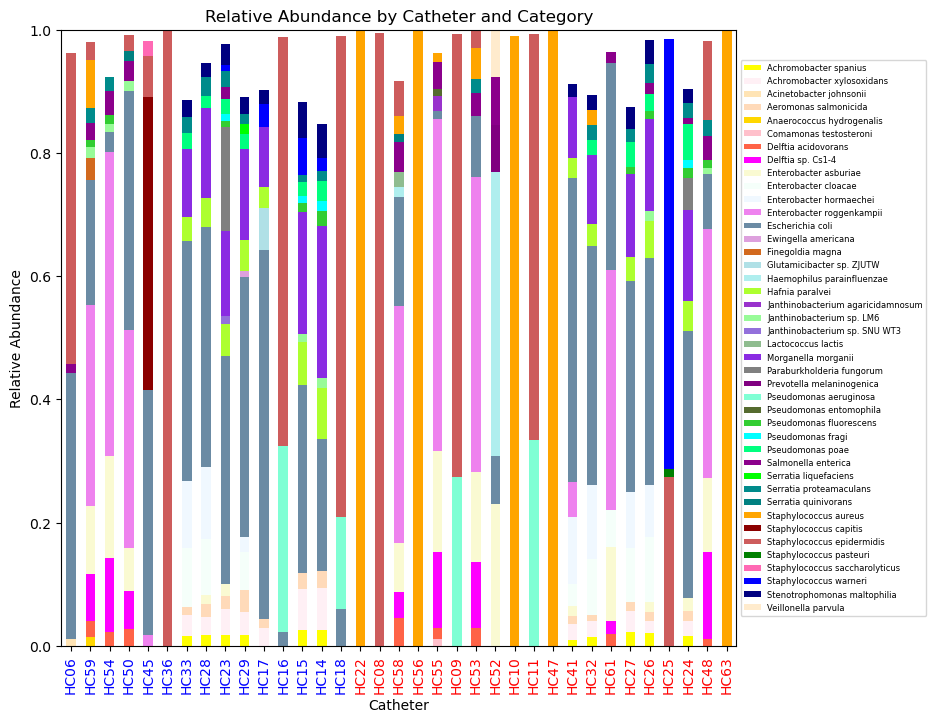

In [21]:
#Generate a stacked bar plot of all the samples and all the species with Symptomatic and Asymptomatic samples distinguished by colour of label and save the image
import math
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

cath_category = pd.read_csv("05022023_Catheter_List_and_Catergory.csv", index_col=0)
# create a dictionary to map categories to colors

category_color_dict = {"Symptomatic": "red", "Asymptomatic": "blue"}

# add the color row to the dataframe

category_order = cath_category["Category"].unique()
cath_filtered2 = cath_filtered.T
cath_filtered3 = pd.concat([cath_filtered2, cath_category], axis=1)
cath_filtered4 = cath_filtered3.sort_values(by=["Category"], key=lambda x: pd.Categorical(x, categories=category_order))

#create a list of colors using tab20b and tab20c colormaps
#cmap1 = plt.get_cmap('tab20')
#cmap2 = plt.get_cmap('tab20b')
#cmap3 = plt.get_cmap('tab20c')
#colors = [cmap1(i) for i in range(20)] + [cmap2(i) for i in range(20)] + [cmap3(i) for i in range(20)]

# add two more unique colors to get a total of 42 colors
#colors.append(cmap1(20))
#colors.append(cmap2(20))
#colors.append(cmap3(20))

fig, ax = plt.subplots(figsize=(10, 8))

# create the stacked bar plot

ax = cath_filtered4.plot.bar(stacked=True, ylim=(0,1), color=cmap, ax=ax)
ax.set_xticks(range(len(cath_filtered4.index)))

# set the title and axes labels
ax.set_title('Relative Abundance by Catheter and Category')
ax.set_xlabel('Catheter')
ax.set_ylabel('Relative Abundance')

for tick, label in zip(ax.get_xticks(), ax.get_xticklabels()):
    category = cath_category.loc[label.get_text(), "Category"]
    label.set_color(category_color_dict[category])

# set the y-axis limit to make space for the color row
ax.set_ylim(0, 1.0)

fig.subplots_adjust(right=0.8)
ax.legend(loc='center left', bbox_to_anchor=(1.00, 0.5), fontsize='6')

plt.savefig('05242023_Catheter_stacked_barplot_0.01_cutoff.png', dpi=300, bbox_inches='tight')
plt.show()

In [55]:
#import packages for the next section
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from statannotations.Annotator import Annotator

In [3]:
#alpha_diversity
#import alpha diversity calculated with R
alpha = pd.read_csv('/media/haley/My Book/Siva_Catheter_Work_2023/Siva_Catheter_Figures/05192023_Redo_Analysis_Figures/05192023_Siva_alpha_diversity.csv')

In [4]:
#rename column with catheter names
alpha.rename(columns={"Unnamed: 0": "Catheter"})

,Catheter,Richness,Evenness,Category
0,HC06,4,0.192097,Asymptomatic
1,HC08,1,1.000000,Symptomatic
2,HC09,2,0.854376,Symptomatic
3,HC10,1,1.000000,Symptomatic
4,HC11,2,0.927512,Symptomatic
5,HC14,13,0.566316,Asymptomatic
6,HC15,13,0.474309,Asymptomatic
7,HC16,3,0.289095,Asymptomatic
8,HC17,8,0.446291,Asymptomatic
9,HC18,3,0.459386,Asymptomatic


In [6]:
#Calculate the Wilcoxon rank-sums for the alpha diversity values (Richness)
import pandas as pd
from scipy.stats import ranksums

# Extract the values and categories from the table
values = alpha['Richness']
categories = alpha['Category']

# Split the values into two groups based on categories
group1 = values[categories == 'Asymptomatic']
group2 = values[categories == 'Symptomatic']

# Perform the Wilcoxon rank-sum test
statistic, p_value = ranksums(group1, group2)

# Print the test results
print("Wilcoxon rank-sum test statistic:", statistic)
print("Wilcoxon rank-sum test p-value:", p_value)


Wilcoxon rank-sum test statistic: 1.5333333333333334
Wilcoxon rank-sum test p-value: 0.12519374558181365


In [7]:
#Calculate the Wilcoxon rank-sums for the alpha diversity values (Evenness)
import pandas as pd
from scipy.stats import ranksums

# Extract the values and categories from the table
values = alpha['Evenness']
categories = alpha['Category']

# Split the values into two groups based on categories
group1 = values[categories == 'Asymptomatic']
group2 = values[categories == 'Symptomatic']

# Perform the Wilcoxon rank-sum test
statistic, p_value = ranksums(group1, group2)

# Print the test results
print("Wilcoxon rank-sum test statistic:", statistic)
print("Wilcoxon rank-sum test p-value:", p_value)


Wilcoxon rank-sum test statistic: -2.2
Wilcoxon rank-sum test p-value: 0.02780689502699719


p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

Asymptomatic vs. Symptomatic: t-test independent samples, P_val:2.108e-02 t=-2.422e+00
p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

Asymptomatic vs. Symptomatic: t-test independent samples, P_val:1.684e-01 t=1.408e+00


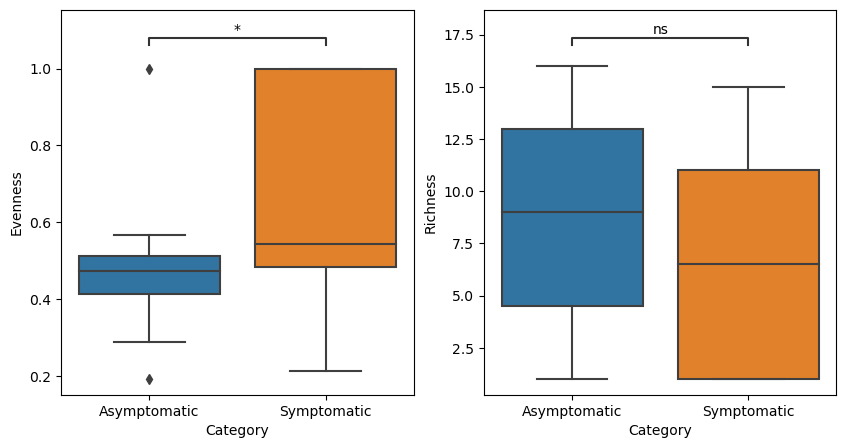

In [58]:
#Generate a figure to depict Evenness and Richness with p-value indicator
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(10, 5))
ax1 = sns.boxplot(x="Category", y="Evenness", data=alpha, ax=ax1)
ax2 = sns.boxplot(x="Category", y="Richness", data=alpha, ax=ax2)

pairs =[('Asymptomatic', 'Symptomatic')]
#annotating with pairs
x = "Category"
y = "Evenness"
order = ['Asymptomatic', 'Symptomatic']
annot = Annotator(ax1, pairs, data=alpha, x="Category", y="Evenness", order=order)
annot.configure(test='t-test_ind', verbose=2)
annot.apply_test()
annot.annotate()

#annotating with pairs
x = "Category"
y = "Richness"
order = ['Asymptomatic', 'Symptomatic']
annot = Annotator(ax2, pairs, data=alpha, x= "Category", y="Richness", order=order)
annot.configure(test='t-test_ind', verbose=2)
annot.apply_test()
annot.annotate()

plt.savefig("05192023_Catheter_alpha_diversity_figure.png", dpi = 400, bbox_inches= "tight")

In [59]:
#beta diversity
#import beta diversity table from R
beta = pd.read_csv("/media/haley/My Book/Siva_Catheter_Work_2023/Siva_Catheter_Figures/05192023_Redo_Analysis_Figures/05192023_Siva_beta_diversity_pcoa_table.csv")

In [60]:
beta

,Unnamed: 0,PC1,PC2,Category
0,1,-0.042100,-0.400114,Asymptomatic
1,2,-0.498893,-0.406528,Symptomatic
2,3,-0.508553,-0.418925,Symptomatic
3,4,-0.367361,0.463181,Symptomatic
4,5,-0.503262,-0.412430,Symptomatic
5,6,0.339091,-0.076590,Asymptomatic
6,7,0.373650,-0.098139,Asymptomatic
7,8,-0.475192,-0.411087,Asymptomatic
8,9,0.364127,-0.110123,Asymptomatic
9,10,-0.435100,-0.417751,Asymptomatic


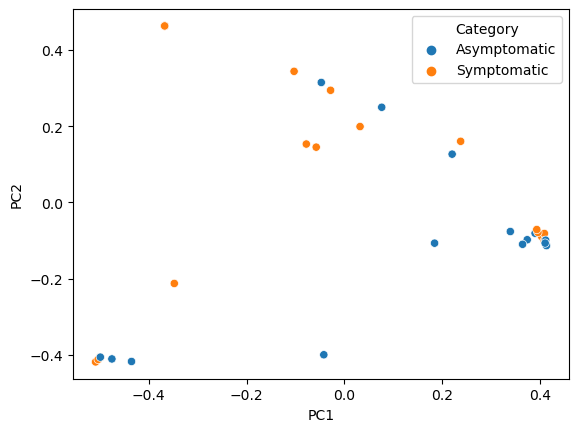

In [62]:
#generate a scatterplot to depict beta diversity and save it
sns.scatterplot(x='PC1', y='PC2', hue='Category', data=beta)


plt.savefig("05192023_Catheter_beta_diversity_scatterplot.png", dpi = 400, bbox_inches= "tight")